In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df['Genre'] = np.where(df['Genre'] == 'Male',1,0)

In [30]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,2


In [59]:
x = df.iloc[:,[2,4]]

In [60]:
wcss = []
for i in range(1,11):
    mod = KMeans(n_clusters=i,init='k-means++')
    mod.fit(x)
    wcss.append(mod.inertia_)

In [61]:
print(wcss)

[171535.5, 75949.15601023019, 45840.67661610866, 28165.583566629335, 23810.46223307137, 19510.32880277617, 15523.68401432875, 13039.801560846563, 11518.901989274886, 10127.632747124051]


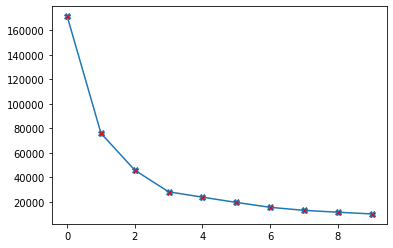

In [62]:
plt.plot(wcss,marker='X',markerfacecolor='red')

In [65]:
model = KMeans(n_clusters=5,init='k-means++')

In [66]:
model.fit(x)

KMeans(n_clusters=5)

In [67]:
pred = model.predict(x)

In [68]:
pred

array([1, 0, 4, 0, 1, 0, 4, 0, 3, 0, 3, 0, 3, 0, 4, 0, 1, 1, 3, 0, 1, 0,
       3, 0, 3, 0, 3, 1, 4, 0, 3, 0, 3, 0, 3, 0, 4, 0, 4, 0, 2, 0, 2, 1,
       3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 4, 0, 2, 0, 3, 0, 3, 0,
       1, 0, 4, 0, 3, 0, 4, 0, 3, 0, 1, 0, 4, 0, 2, 0, 4, 0, 3, 0, 3, 0,
       3, 0, 4, 0, 4, 0, 2, 0, 4, 0, 3, 0, 4, 0, 4, 1, 4, 0, 4, 0, 3, 0,
       3, 0, 3, 0, 4, 0, 3, 0, 1, 0, 3, 0, 4, 0, 4, 0, 4, 0, 3, 0, 3, 0,
       4, 0], dtype=int32)

In [69]:
x['Cluster'] = pred

/tmp/ipykernel_4812/366410570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster'] = pred


sns.relplot(x['Annual Income (k$)'],x['Spending Score (1-100)'],hue=x['Cluster'])

/home/eshaan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


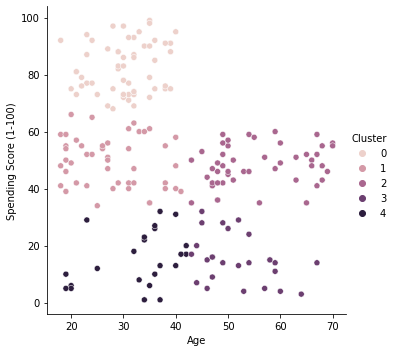

In [70]:
sns.relplot(x['Age'],x['Spending Score (1-100)'],hue=x['Cluster'])

In [71]:
from sklearn.metrics import silhouette_score

In [72]:
silhouette_score(x, model.labels_,metric='euclidean')

0.46240937603341337

# DBScan

In [74]:
mod_scan = DBSCAN(eps=5,min_samples=5)

In [75]:
lbl = mod_scan.fit_predict(x)

In [76]:
lbl

array([ 6,  0, -1,  0,  1,  0,  2, -1, -1,  0, -1,  0,  2,  0,  2,  0, -1,
       -1, -1,  0, -1,  0, -1,  0,  2,  0, -1,  3, -1,  0, -1,  0, -1, -1,
        2,  0,  2,  0, -1,  0, -1,  0, -1,  3, -1, -1,  4,  6,  1,  1,  4,
        3,  6, -1,  4,  4,  4,  5,  6,  4,  5,  6,  5,  4,  5,  6,  4,  5,
        6,  1,  5,  4,  5, -1, -1,  6,  4, -1,  6,  4, -1, -1,  5,  4,  6,
        4, -1,  6,  3,  4,  5,  6,  4,  7,  1,  6,  4,  6,  4,  6,  6,  4,
        5,  6,  4,  6,  5,  4,  5,  5,  5,  6,  7,  6,  6,  6,  5,  4,  4,
        4,  6,  7, -1,  0, -1,  0,  7,  0,  2,  0, -1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0, -1,  0,  1,  0, -1,  0, -1,  0, -1,  0,  2,  0,  2,
        0,  2,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,  2,  0, -1,  3,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0,  7,  0, -1,
        0,  2,  0, -1,  0,  2,  0,  2,  0, -1,  0, -1,  0])

In [79]:
x.loc[:,'Cluster'] = lbl

/home/eshaan/.local/lib/python3.10/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


/home/eshaan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


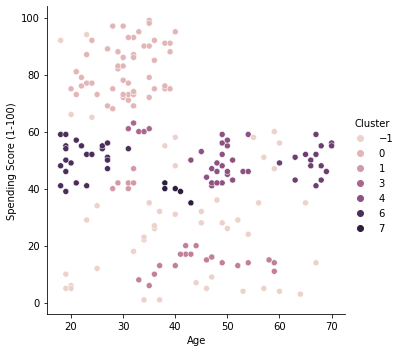

In [78]:
sns.relplot(x['Age'],x['Spending Score (1-100)'],hue=x['Cluster'])

/home/eshaan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='count'>

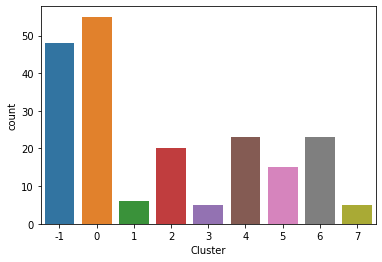

In [80]:
sns.countplot(x['Cluster'])

In [87]:
silhouette_score(x.iloc[:,[0,1]],mod_scan.labels_,metric='euclidean')

0.18128660673220495

In [86]:
silhouette_score(x.iloc[:,[0,1]],mod_scan.labels_,metric='manhattan')

0.174765864583864

# IRIS

In [88]:
df = pd.read_csv('Iris.csv')

In [89]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [90]:
from sklearn.preprocessing import StandardScaler

In [93]:
df_scaled = StandardScaler().fit_transform(df.drop(['Id','Species'],axis=1))

In [95]:
z = linkage(df_scaled,'ward')

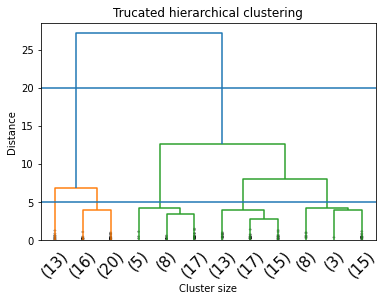

In [97]:
dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15,show_contracted=True)
plt.title('Trucated hierarchical clustering')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.axhline(y=20)
plt.axhline(y=5)

In [109]:
k=3
hcluster = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')

In [110]:
hcluster.fit(df_scaled)

AgglomerativeClustering(n_clusters=3)

In [111]:
pred = hcluster.fit_predict(df_scaled)

/home/eshaan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

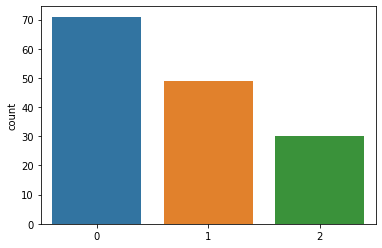

In [112]:
sns.countplot(pred)

/home/eshaan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

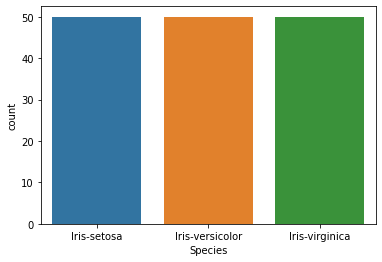

In [108]:
sns.countplot(df['Species'])

In [121]:
silhouette_score(df_scaled,hcluster.labels_,metric='euclidean')

0.44553956399200406

In [119]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i,init='k-means++')
    model.fit(df_scaled)
    model.predict(df_scaled)
    wcss.append(model.inertia_)

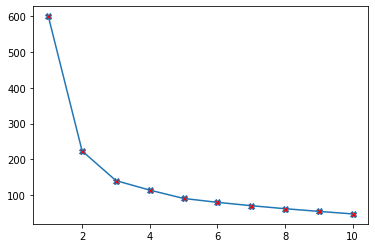

In [120]:
plt.plot(range(1,11),wcss,marker='X',markerfacecolor='red')

In [122]:
from sklearn.metrics import accuracy_score

In [133]:
df_new = df.copy()

In [134]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [135]:
df_new.replace(to_replace='Iris-setosa',value=0,inplace=True)
df_new.replace(to_replace='Iris-virginica',value=2,inplace=True)
df_new.replace(to_replace='Iris-versicolor',value=1,inplace=True)

###### accuracy_score(df_new.Species,pred)